In [119]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [91]:
#Subindo arquivo csv e carregando em um DataFrame Pandas

from google.colab import files

uploaded = files.upload()

df = pd.read_csv('MKT.csv')

Saving MKT.csv to MKT (1).csv


#Análise Descritiva dos Dados

In [2]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


As colunas youtube, facebook e newspaper trazem valores com gastor de publicidade nesses meios. E a coluna sales o retorno obtido em vendas com os leads gerados com essas campanhas.


In [3]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Foram feitas 171 campanhas.

O gasto médio com campanhas
* Youtube :178,02
* Facebook :27.67
* Jornais: 35,24

E obtido o retorno médio em vendas de 16,92




In [14]:
df[df['youtube']+df['facebook']+df['newspaper'] >= df['sales']]


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


Ou não houve campanha positiva ou o dados contidos em sales não estão em unidades monetária simples, possivelmente a unidade usada para as vendas são os milhares assim a primeira campanha usou 84,72 unidades monetárias no youbute, mais 19,20 no facebook, além de 48,96 e obteve 12600 (doze mil e seisentas ) unidades monetárias em vendas. Por isso a partir daqui vou multiplicar as vendas por 1000 para facilitar as analises.

In [92]:
df['sales'] = df['sales'] * 1000

Também para facilitar as analises posteriores criarei outras colunas, como o de gasto total, e a de retorno

In [93]:
df['expenditure'] = df['youtube']+df['facebook']+df['newspaper']

In [94]:
df['return'] = (df['sales'] - df['expenditure'])/df['expenditure']

In [46]:
df.head()

,youtube,facebook,newspaper,sales,expenditure,return
0,84.72,19.20,48.96,12600.0,152.88,81.417582
1,351.48,33.96,51.84,25680.0,437.28,57.726674
2,135.48,20.88,46.32,14280.0,202.68,69.455891
3,116.64,1.80,36.00,11520.0,154.44,73.592075
4,318.72,24.00,0.36,20880.0,343.08,59.860441


# Análise Exploratória

Text(0, 0.5, 'Frequência')

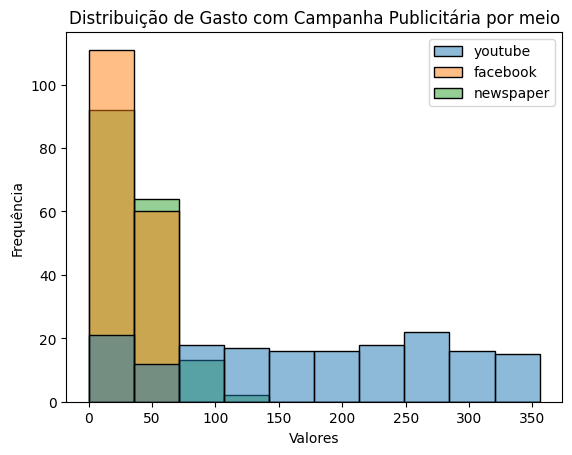

In [40]:
sns.histplot(df[['youtube','facebook','newspaper']],bins=10)
plt.title('Distribuição de Gasto com Campanha Publicitária por meio')
plt.xlabel('Valores')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

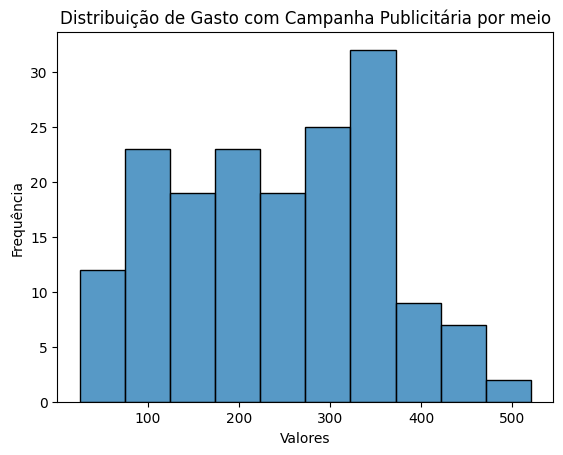

In [47]:
sns.histplot(df['expenditure'],bins=10)
plt.title('Distribuição de Gasto com Campanha Publicitária por meio')
plt.xlabel('Valores')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

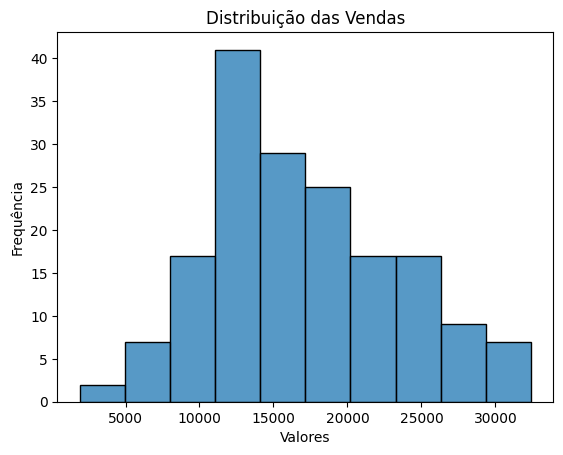

In [41]:
sns.histplot(df['sales'],bins=10)
plt.title('Distribuição das Vendas')
plt.xlabel('Valores')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

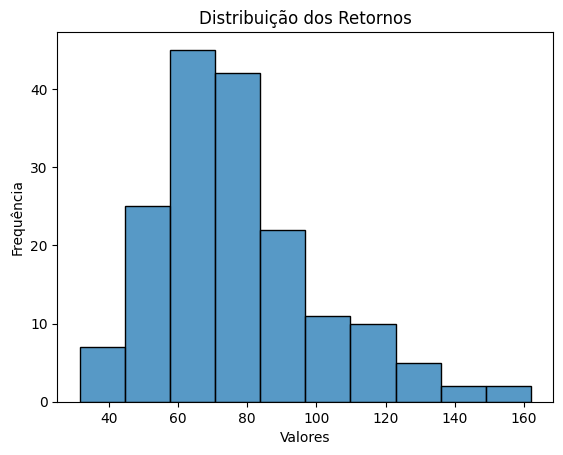

In [49]:
sns.histplot(df['return'],bins=10)
plt.title('Distribuição dos Retornos')
plt.xlabel('Valores')
plt.ylabel('Frequência')

Text(0.5, 1.0, 'Facebook')

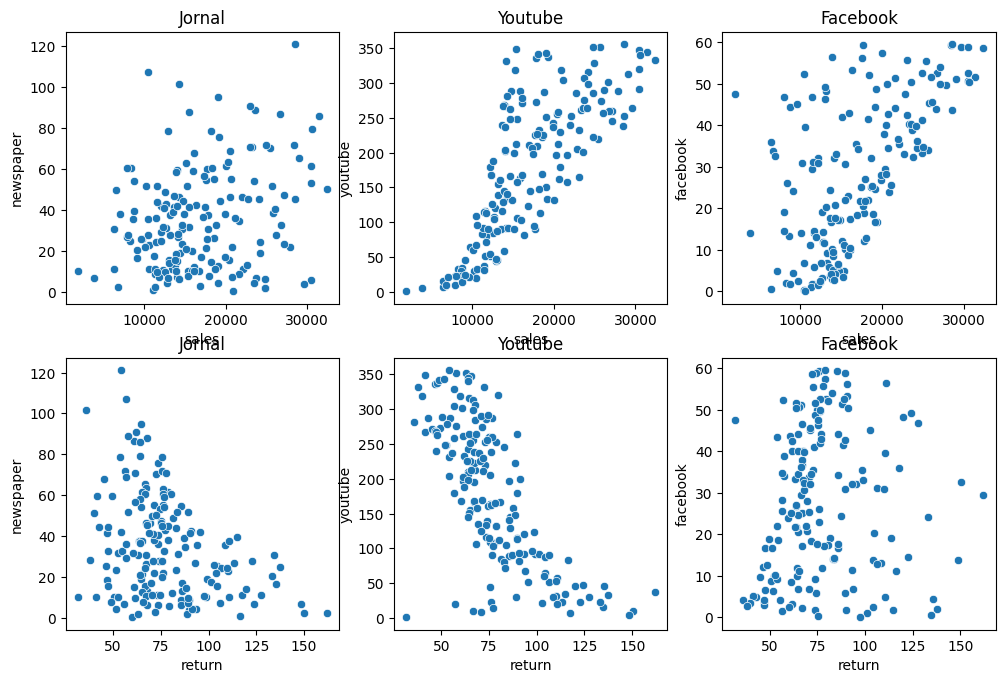

In [62]:

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.scatterplot(x=df['sales'],y=df['newspaper'])
plt.title('Jornal')
plt.subplot(3,3,2)
plt.title('Youtube')
sns.scatterplot(x=df['sales'],y=df['youtube'])
plt.subplot(3,3,3)
sns.scatterplot(x=df['sales'],y=df['facebook'])
plt.title('Facebook')
plt.subplot(3,3,4)
sns.scatterplot(x=df['return'],y=df['newspaper'])
plt.title('Jornal')
plt.subplot(3,3,5)
sns.scatterplot(x=df['return'],y=df['youtube'])
plt.title('Youtube')
plt.subplot(3,3,6)
sns.scatterplot(x=df['return'],y=df['facebook'])
plt.title('Facebook')

Pelos gráficos vemos um fenêmeno interessante, quanto maior o gasto em publicidade no Youtube maiores as vendas mostrando um correlação positiva já esperada entretanto quanto maior o gasto menos eficiente ele se mostra, mas o mesmo não acontece no Facebook o que pode sinalizar uma maior eficiência. O fenômeno pode ser explicado em como as duas redes sociais se diferem, não adianta aplicar muito mais recursos no Youtube, não vão entregar fora do nincho agora já o Facebook sim.

Pelos gráficos observamos que os as campanhas no Youtube apresentam um retorno menos disperso do que o do Facebook e os gastos com publicidade em Jornais se prova realmente inconsistentes.

In [64]:
df.corr()

,youtube,facebook,newspaper,sales,expenditure,return
youtube,1.000000,0.086538,0.110759,0.782030,0.951773,-0.715534
facebook,0.086538,1.000000,0.293425,0.602918,0.303889,0.086803
newspaper,0.110759,0.293425,1.000000,0.254987,0.370040,-0.345844
sales,0.782030,0.602918,0.254987,1.000000,0.867176,-0.384232
expenditure,0.951773,0.303889,0.370040,0.867176,1.000000,-0.716462
return,-0.715534,0.086803,-0.345844,-0.384232,-0.716462,1.000000


<Axes: >

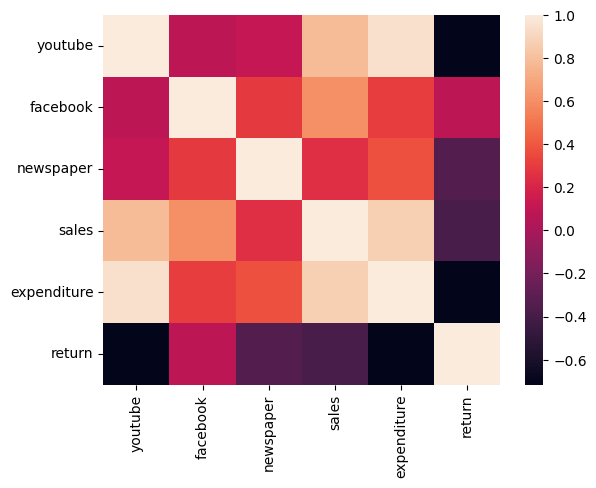

In [66]:
sns.heatmap(df.corr())

Analisando os gastos e a correlações com as vendas e a coluna calculada retorno, achamos que a agência deveria diminuir os gastos em publicidade em jornais e aumentar no canal Facebook já que a correlação com a primeira é de 25% e da segunda 60% e o Facebook ainda tem a vantagem de ser o unico dos três canais sem um correlação negativa com o retorno, logo aumentar o gasto nesse canal se prova a melhor opção se a Agência buscar maximizar o retorno em cada campanha.

<Axes: >

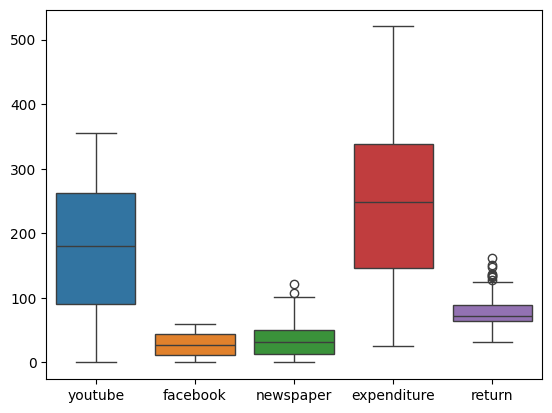

In [125]:
sns.boxplot(df.drop(columns=['sales']))

<Axes: ylabel='sales'>

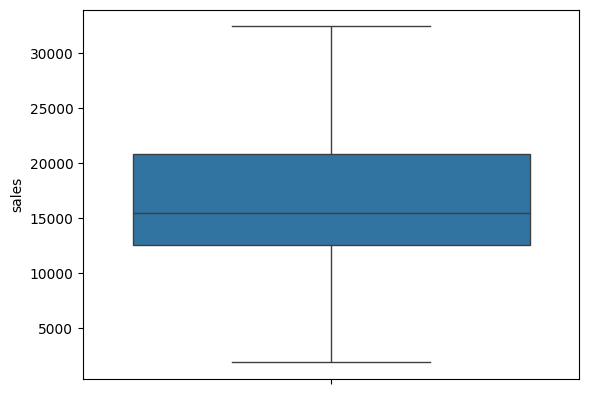

In [126]:
sns.boxplot(df['sales'])

# Modelagem

In [97]:

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df[['youtube','facebook','newspaper']], df['sales'], test_size=0.2, random_state=123)

# Normalizar os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [110]:

# Define list of models
models = [
    LinearRegression(),
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
]

# Define list of hyperparameters for each model


hyperparameters = {
    'LinearRegression': {
        'fit_intercept': [True, False],

    },
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
    },
    'RandomForestRegressor': {
        'n_estimators': [5,10,15,20,25,30,35,40,45,50, 100,200,300],
        'max_depth': [None, 1,2,3,4,5,10,15,20,25],
    },
    'GradientBoostingRegressor': {
        'n_estimators': [5,10,15,20,25,30,35,40,45,50, 100],
        'max_depth': [None, 1,2,3,4,5,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
        'min_weight_fraction_leaf': [0.0,0.1,0.2],
    },
    'XGBRegressor': {
        'n_estimators': [5,10,15,20,25,30,35,40,45,50, 100,200,300],
        'max_depth': [None, 1,2,3,4,5, 10],
    },
}

# Perform grid search for each model
for model in models:
    grid_search = GridSearchCV(model, hyperparameters[model.__class__.__name__], cv=5)
    grid_search.fit(X_train, y_train)

    # Print best score and best parameters for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Best score: {grid_search.best_score_}")
    print(f"Best parameters: {grid_search.best_params_}")
    print()


Model: LinearRegression
Best score: 0.8745873581439904
Best parameters: {'fit_intercept': True}

Model: SVR
Best score: 0.19326173584676093
Best parameters: {'C': 10, 'kernel': 'linear'}

Model: RandomForestRegressor
Best score: 0.976058339187597
Best parameters: {'max_depth': 15, 'n_estimators': 45}

Model: GradientBoostingRegressor
Best score: 0.9773277339851882
Best parameters: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}

Model: XGBRegressor
Best score: 0.9756797853606776
Best parameters: {'max_depth': 3, 'n_estimators': 45}



O modelo escolhido é o Gradient Boosting do Sklearn [1](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#gradientboostingregressor)

# Predição

In [120]:
best_model = GradientBoostingRegressor(max_depth=4, min_samples_leaf= 5)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Mean Error:", np.sqrt(mse))
print("R-squared score:", r2)

Mean squared error: 1250038.165350215
Mean Error: 1118.0510566831083
R-squared score: 0.966379003277146


O modelo escolhido consegue um precisão de 96,63%. O que significa um erro de 1118 unidades monetárias.   